In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Making a dataframe to categorise the countries by FAO standards

In [2]:
#This will be used at a later stage
#fbs_df["Area"].unique()
countrygroups = pd.read_csv("FAOSTAT_data_5-7-2022.csv", encoding="latin-1")
countrygroups.columns=countrygroups.columns.str.replace(' ','_')
countrygroups = countrygroups[["Country_Group","Country"]]
cat =  [True for i in range(len(countrygroups))]
countrygroups["cat"] = cat

In [3]:
countrygroups.head()
#countrygroups.info()
# print(countrygroups.describe())
#countrygroups["Country_Group"].unique()

,Country_Group,Country,cat
0,Africa,Algeria,True
1,Africa,Algeria,True
2,Africa,Angola,True
3,Africa,Angola,True
4,Africa,Benin,True


In [4]:
countrygroups = countrygroups.drop_duplicates()

In [5]:
pd.pivot(countrygroups, index="Country", columns="Country_Group", values="cat")

Country_Group,Africa,Americas,Annex I countries,Antarctic Region,Asia,Australia and New Zealand,Caribbean,Caucasus and Central Asia,Central America,Central Asia,...,Southern Europe,Sub-Saharan Africa,Sub-Saharan Africa (including Sudan),Upper-middle-income economies,Western Africa,Western Asia,"Western Asia (exc. Armenia, Azerbaijan, Cyprus, Israel and Georgia)",Western Asia and Northern Africa,Western Europe,World
Country,,,,,,,,,,,,,,,,,,,,,
?land Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
Afghanistan,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,True
Algeria,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,True,NaN,NaN,NaN,True,NaN,True
American Samoa,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yemen Ar Rp,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,True
Yemen Dem,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,True
Yugoslav SFR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [6]:
## The UN also has a standardised classification system called the geoscheme, but the FAO classifications seem to closely
## follow the geoscheme, and the small differences between them made using the UN geoscheme very labour-intensive. That is
## why I switched to the above method. This is simply kept in case it comes in handy.
# geoscheme = pd.read_csv("UNSD — Methodology.csv")
# geoscheme.columns=geoscheme.columns.str.replace(' ','_')
# geoscheme = geoscheme.sort_values(by = 'Country_or_Area')
# geoscheme["Country_or_Area"].unique()

# Setting up

In [7]:
#Food Balance sheet data. I commented out the use of the new data.
#fbs_df = pd.read_csv("FoodBalanceSheets_E_All_Data_(Normalized).csv", encoding="latin-1")
fbs_df = pd.read_csv("FoodBalanceSheetsHistoric_E_All_Data_(Normalized).csv", encoding="latin-1")

In [8]:
fbs_df.tail()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
11479898,5817,Net Food Importing Developing Countries,2899,Miscellaneous,684,Fat supply quantity (g/capita/day),2009,2009,g/capita/day,0.01,Fc
11479899,5817,Net Food Importing Developing Countries,2899,Miscellaneous,684,Fat supply quantity (g/capita/day),2010,2010,g/capita/day,0.01,Fc
11479900,5817,Net Food Importing Developing Countries,2899,Miscellaneous,684,Fat supply quantity (g/capita/day),2011,2011,g/capita/day,0.01,Fc
11479901,5817,Net Food Importing Developing Countries,2899,Miscellaneous,684,Fat supply quantity (g/capita/day),2012,2012,g/capita/day,0.01,Fc
11479902,5817,Net Food Importing Developing Countries,2899,Miscellaneous,684,Fat supply quantity (g/capita/day),2013,2013,g/capita/day,0.02,Fc


In [9]:
fbs_df.columns=fbs_df.columns.str.replace(' ','_')

In [10]:
#These are the item codes of problematic items
eggsmilkmisc = [2949,2948,2928,2899]

In [11]:
fbs_df_order = fbs_df.sort_values(by = ['Area_Code', 'Item_Code','Element_Code',"Year_Code"])
# remove problematic items. Eggs, milk, and misc are doubled, as they are counted as "items" and "aggregates"
# with the same values
fbs_df_order = fbs_df_order[(fbs_df_order.Item_Code != 2949) & (fbs_df_order.Item_Code != 2948)
                            & (fbs_df_order.Item_Code != 2928) & (fbs_df_order.Item_Code != 2899)]
fbs_df_order = fbs_df_order.reset_index(drop=True)

In [12]:
# The old data uses "Groundnuts (Shelled Eq)" while the new uses "Groundnuts".
# So I can simply switch between the different datasets, I am fixing this.
fbs_df_order["Item"] = fbs_df_order["Item"].apply(lambda x: x.replace("Groundnuts (Shelled Eq)", "Groundnuts"))

In [13]:
# The df has over 110 million cells! I'll have to use very efficient code when working with this.
print(fbs_df_order.info())
print(fbs_df_order.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11117708 entries, 0 to 11117707
Data columns (total 11 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Area_Code     int64  
 1   Area          object 
 2   Item_Code     int64  
 3   Item          object 
 4   Element_Code  int64  
 5   Element       object 
 6   Year_Code     int64  
 7   Year          int64  
 8   Unit          object 
 9   Value         float64
 10  Flag          object 
dtypes: float64(1), int64(5), object(5)
memory usage: 933.0+ MB
None
          Area_Code     Item_Code  Element_Code     Year_Code          Year  \
count  1.111771e+07  1.111771e+07  1.111771e+07  1.111771e+07  1.111771e+07   
mean   1.232124e+03  2.687885e+03  3.714450e+03  1.987694e+03  1.987694e+03   
std    2.146956e+03  1.429577e+02  2.273880e+03  1.535452e+01  1.535452e+01   
min    1.000000e+00  2.501000e+03  5.110000e+02  1.961000e+03  1.961000e+03   
25%    7.900000e+01  2.562000e+03  6.740000e+02  1.974000e+03  1.97400

In [14]:
fbs_df_order.head()

,Area_Code,Area,Item_Code,Item,Element_Code,Element,Year_Code,Year,Unit,Value,Flag
0,1,Armenia,2501,Population,511,Total Population - Both sexes,1992,1992,1000 persons,3449.0,NaN
1,1,Armenia,2501,Population,511,Total Population - Both sexes,1993,1993,1000 persons,3370.0,NaN
2,1,Armenia,2501,Population,511,Total Population - Both sexes,1994,1994,1000 persons,3290.0,NaN
3,1,Armenia,2501,Population,511,Total Population - Both sexes,1995,1995,1000 persons,3223.0,NaN
4,1,Armenia,2501,Population,511,Total Population - Both sexes,1996,1996,1000 persons,3173.0,NaN


# Adding the population to each row

In [15]:
# Get the population of every country for every year
fbs_pops = pd.pivot_table(fbs_df_order, index=["Area","Year_Code"], columns="Element", values="Value", aggfunc=np.mean)
# in code deleted for tidiness, I confirmed that this df was equal to one where aggfunc=np.sum.
# this was to be sure there were not double entries that could mess up the analysis
fbs_pops = fbs_pops.reset_index()
fbs_pops.columns=fbs_pops.columns.str.replace(' ','_')

In [16]:
fbs_pops = fbs_pops[["Area","Year_Code","Total_Population_-_Both_sexes"]]

In [17]:
fbs_pops

Element,Area,Year_Code,Total_Population_-_Both_sexes
0,Afghanistan,1961,8954.0
1,Afghanistan,1962,9142.0
2,Afghanistan,1963,9340.0
3,Afghanistan,1964,9547.0
4,Afghanistan,1965,9765.0
...,...,...,...
10388,Zimbabwe,2009,12889.0
10389,Zimbabwe,2010,13077.0
10390,Zimbabwe,2011,13359.0
10391,Zimbabwe,2012,13724.0


In [18]:
# testing this way of finding the population based on the area and year
(fbs_pops.loc[(fbs_pops['Area'] == "Afghanistan") & (fbs_pops['Year_Code'] == 1967)])["Total_Population_-_Both_sexes"].iloc[0]

10222.0

In [19]:
# We'll be working with this pivot table for a while.
fbs_pivot_cal_to_tonne = pd.pivot(fbs_df_order, index=["Area","Year_Code","Item"], columns="Element", values="Value")
fbs_pivot_cal_to_tonne.columns=fbs_pivot_cal_to_tonne.columns.str.replace(' ','_')
fbs_pivot_cal_to_tonne = fbs_pivot_cal_to_tonne.reset_index()

In [20]:
def add_pop(df, ref_df):
    # working with lists is far more efficient
    area = df["Area"].tolist()
    year = df["Year_Code"].tolist()
    # getting the population based on area and year
    poptemp = ref_df.loc[((ref_df['Area'] == area[0]) & (ref_df['Year_Code'] == year[0]),
                          "Total_Population_-_Both_sexes")].iloc[0]
    pop = [poptemp]
    for i in range(1,len(area)):
        # retrieving the population is slow, so I only retrieve it when the area and year changes.
        # because the df is ordered by area and year, this is about 100 times faster
        if (area[i] == area[i-1]) and (year[i] == year[i-1]):
            pop.append(poptemp)
        else:
            poptemp = ref_df.loc[((ref_df['Area'] == area[i]) & (ref_df['Year_Code'] == year[i]),
                                   "Total_Population_-_Both_sexes")].iloc[0]
            pop.append(poptemp)
    return pop

In [21]:
pop_list = add_pop(fbs_pivot_cal_to_tonne, fbs_pops)
fbs_pivot_cal_to_tonne["pop"] = pop_list

In [22]:
# This is a relatively straightforward and much more efficient function to add the population to each row,
# but I could not fix a bug that resulted in 113 missing numbers - may revisit
# def add_pop(df):
#     area = df["Area"].tolist()
#     year = df["Year_Code"].tolist()
#     item = df["Item"].tolist()
#     population = df["Total_Population_-_Both_sexes"].tolist()
#     pop = []
#     multiplier = 1
#     temparea = ""
#     tempyear = 0
#     for i in range(0,(len(item) - 1)):
#         if item[i] < item[i+1]:
#             multiplier = multiplier + 1
#             if item[i] == "Population" and ((area[i] != temparea) or (year[i] != tempyear)):
#                 temppop = population[i]
#                 temparea = area[i]
#                 tempyear = year[i]
#             elif item[i] == "Population" and area[i] == temparea and year[i] == tempyear:
#                 temppop = np.nan
#         else:
#             pop += multiplier * [temppop]
#             multiplier = 1
#     return pop

# Convert 1000tonnes to other indicators

In order to relate production to dietary indices, I need a means of converting the units of production, feed, seed, etc., 1000tonnes, to units that can be used with dietary indices. This will be kcal/capita/day, but I will also have a figure for the total dietary energy supply for the country. I will use (kcal/day)/1000. Therefore, I will calculate factors by which the production data can be multiplied. For the kcal/cal/day variable that I want to create, this factor will be calculated as food supply in kcal/capita/day divided by food supply in 1000 tonnes. By multiplying this factor by the population size in (1000s people), the factor for the country's total production is calculated.

I had hoped that these factors would only need to be calculated once per food item, but because of slight differences in the composition of each food item between countries and over time (e.g. the fish consumed in Ireland may be different to fish consumed in Indonesia), both of these factors had to be calculated for every country * year * food item.

We will see below how the values of the factor are distributed. Initially I had hoped that the variance would be so low that I could universalise the mean or median for each food item. But the distributions varied significantly between food items, with a couple even being bimodal!

In [23]:
def cal_to_tonne(df):
    foodtonne = df["Food"].tolist()
    foodcal = df["Food_supply_(kcal/capita/day)"].tolist()
    popul = df["pop"].tolist()
    ratiostotal = []
    ratiospercap = []
    for i in range(0,len(foodtonne)):
        if (foodtonne[i] > 0) and (foodcal[i] > 0):
            ratiospercap.append(foodcal[i] / foodtonne[i])
            ratiostotal.append((foodcal[i] * popul[i]) / foodtonne[i])
        else:
            ratiospercap.append(np.nan)
            ratiostotal.append(np.nan)
    return ratiostotal, ratiospercap

In [24]:
ratiostotal, ratiospercap = cal_to_tonne(fbs_pivot_cal_to_tonne)

In [25]:
# Multiply a 1000tonne figure by ratiostotal to get the total energy for the area
# The units of ratiostotal are (1000kcal/day)/(1000tonnes)
# Multiply a 1000tonne figure by ratiospercap to get the total energy for the area
# The units of ratiospercap are (kcal/cap/day)/(1000tonnes)
fbs_pivot_cal_to_tonne["caltonrattotal"] = ratiostotal
fbs_pivot_cal_to_tonne["caltonratpercap"] = ratiospercap

# Investigating the distributions of these factors

In [26]:
caltonratcalc_df = fbs_pivot_cal_to_tonne[["Area","Year_Code","Item","caltonrattotal","caltonratpercap"]]

In [27]:
caltonratcalc_df

Element,Area,Year_Code,Item,caltonrattotal,caltonratpercap
0,Afghanistan,1961,Alcoholic Beverages,NaN,NaN
1,Afghanistan,1961,Animal Products,NaN,NaN
2,Afghanistan,1961,Animal fats,21041.900000,2.350000
3,Afghanistan,1961,Apples and products,1279.142857,0.142857
4,Afghanistan,1961,Bananas,NaN,NaN
...,...,...,...,...,...
1157929,Zimbabwe,2013,Vegetables,685.682819,0.048458
1157930,Zimbabwe,2013,"Vegetables, other",729.381443,0.051546
1157931,Zimbabwe,2013,Vegetal Products,NaN,NaN
1157932,Zimbabwe,2013,Wheat and products,7761.738149,0.548533


In [28]:
caltonratcalc_df = pd.pivot(caltonratcalc_df, index=["Area","Year_Code"], columns="Item", values="caltonrattotal")

In [29]:
caltonratcalc_df

Item                   Alcohol, Non-Food  Alcoholic Beverages  \
Area        Year_Code                                           
Afghanistan 1961                     NaN                  NaN   
            1962                     NaN                  NaN   
            1963                     NaN                  NaN   
            1964                     NaN                  NaN   
            1965                     NaN                  NaN   
...                                  ...                  ...   
Zimbabwe    2009                     NaN          1976.116705   
            2010                     NaN          1926.522321   
            2011                     NaN          1852.298319   
            2012                     NaN          2065.135238   
            2013                     NaN          2084.108527   

Item                   Animal Products   Animal fats  Apples and products  \
Area        Year_Code                                                       
Afghanistan 1961                   NaN  21041.900000          1279.142857   
            1962                   NaN  21483.700000          1306.000000   
            1963                   NaN  22238.095238          1334.285714   
            1964                   NaN  22131.681818          1123.176471   
            1965                   NaN  21564.375000          1541.842105   
...                                ...           ...                  ...   
Zimbabwe    2009                   NaN  19125.612903           991.461538   
            2010                   NaN  19179.600000          1307.700000   
            2011                   NaN  19771.320000          1161.652174   
            2012                   NaN  17418.923077          1143.666667   
            2013                   NaN  19810.000000          1347.619048   

Item                   Aquatic Animals, Others  Aquatic Plants  \
Area        Year_Code                                            
Afghanistan 1961                           NaN             NaN   
            1962                           NaN             NaN   
            1963                           NaN             NaN   
            1964                           NaN             NaN   
            1965                           NaN             NaN   
...                                        ...             ...   
Zimbabwe    2009                           NaN             NaN   
            2010                           NaN             NaN   
            2011                           NaN             NaN   
            2012                           NaN             NaN   
            2013                           NaN             NaN   

Item                   Aquatic Products, Other      Bananas  \
Area        Year_Code                                         
Afghanistan 1961                           NaN          NaN   
            1962                           NaN          NaN   
            1963                           NaN          NaN   
            1964                           NaN          NaN   
            1965                           NaN          NaN   
...                                        ...          ...   
Zimbabwe    2009                           NaN  1681.173913   
            2010                           NaN  1601.265306   
            2011                           NaN  1590.357143   
            2012                           NaN  1677.377778   
            2013                           NaN  1572.222222   

Item                   Barley and products  ...  Tea (including mate)  \
Area        Year_Code                       ...                         
Afghanistan 1961               8954.000000  ...                   NaN   
            1962               8949.130802  ...           1523.666667   
            1963               8945.907173  ...           1868.000000   
            1964               8945.298319  ...           1591.166667   
            1965               8944

In [30]:
print(caltonratcalc_df.info())
print(caltonratcalc_df.describe())

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10393 entries, ('Afghanistan', 1961) to ('Zimbabwe', 2013)
Columns: 119 entries, Alcohol, Non-Food to Yams
dtypes: float64(119)
memory usage: 9.5+ MB
None
Item   Alcohol, Non-Food  Alcoholic Beverages  Animal Products   Animal fats  \
count                0.0          9874.000000              0.0   9294.000000   
mean                 NaN          2140.541967              NaN  19109.728743   
std                  NaN          1281.373871              NaN   3251.035676   
min                  NaN           602.000000              NaN   6335.000000   
25%                  NaN          1384.654412              NaN  17652.153256   
50%                  NaN          1762.578659              NaN  19623.719388   
75%                  NaN          2353.893919              NaN  20905.517533   
max                  NaN          9624.272727              NaN  35693.000000   

Item   Apples and products  Aquatic Animals, Others  Aquatic Plants  \
cou

C:\Users\T430\AppData\Local\Temp/ipykernel_19428/3005857513.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  caltonratcalc_df.hist(ax = ax)         # draw a histogram based on the dataset


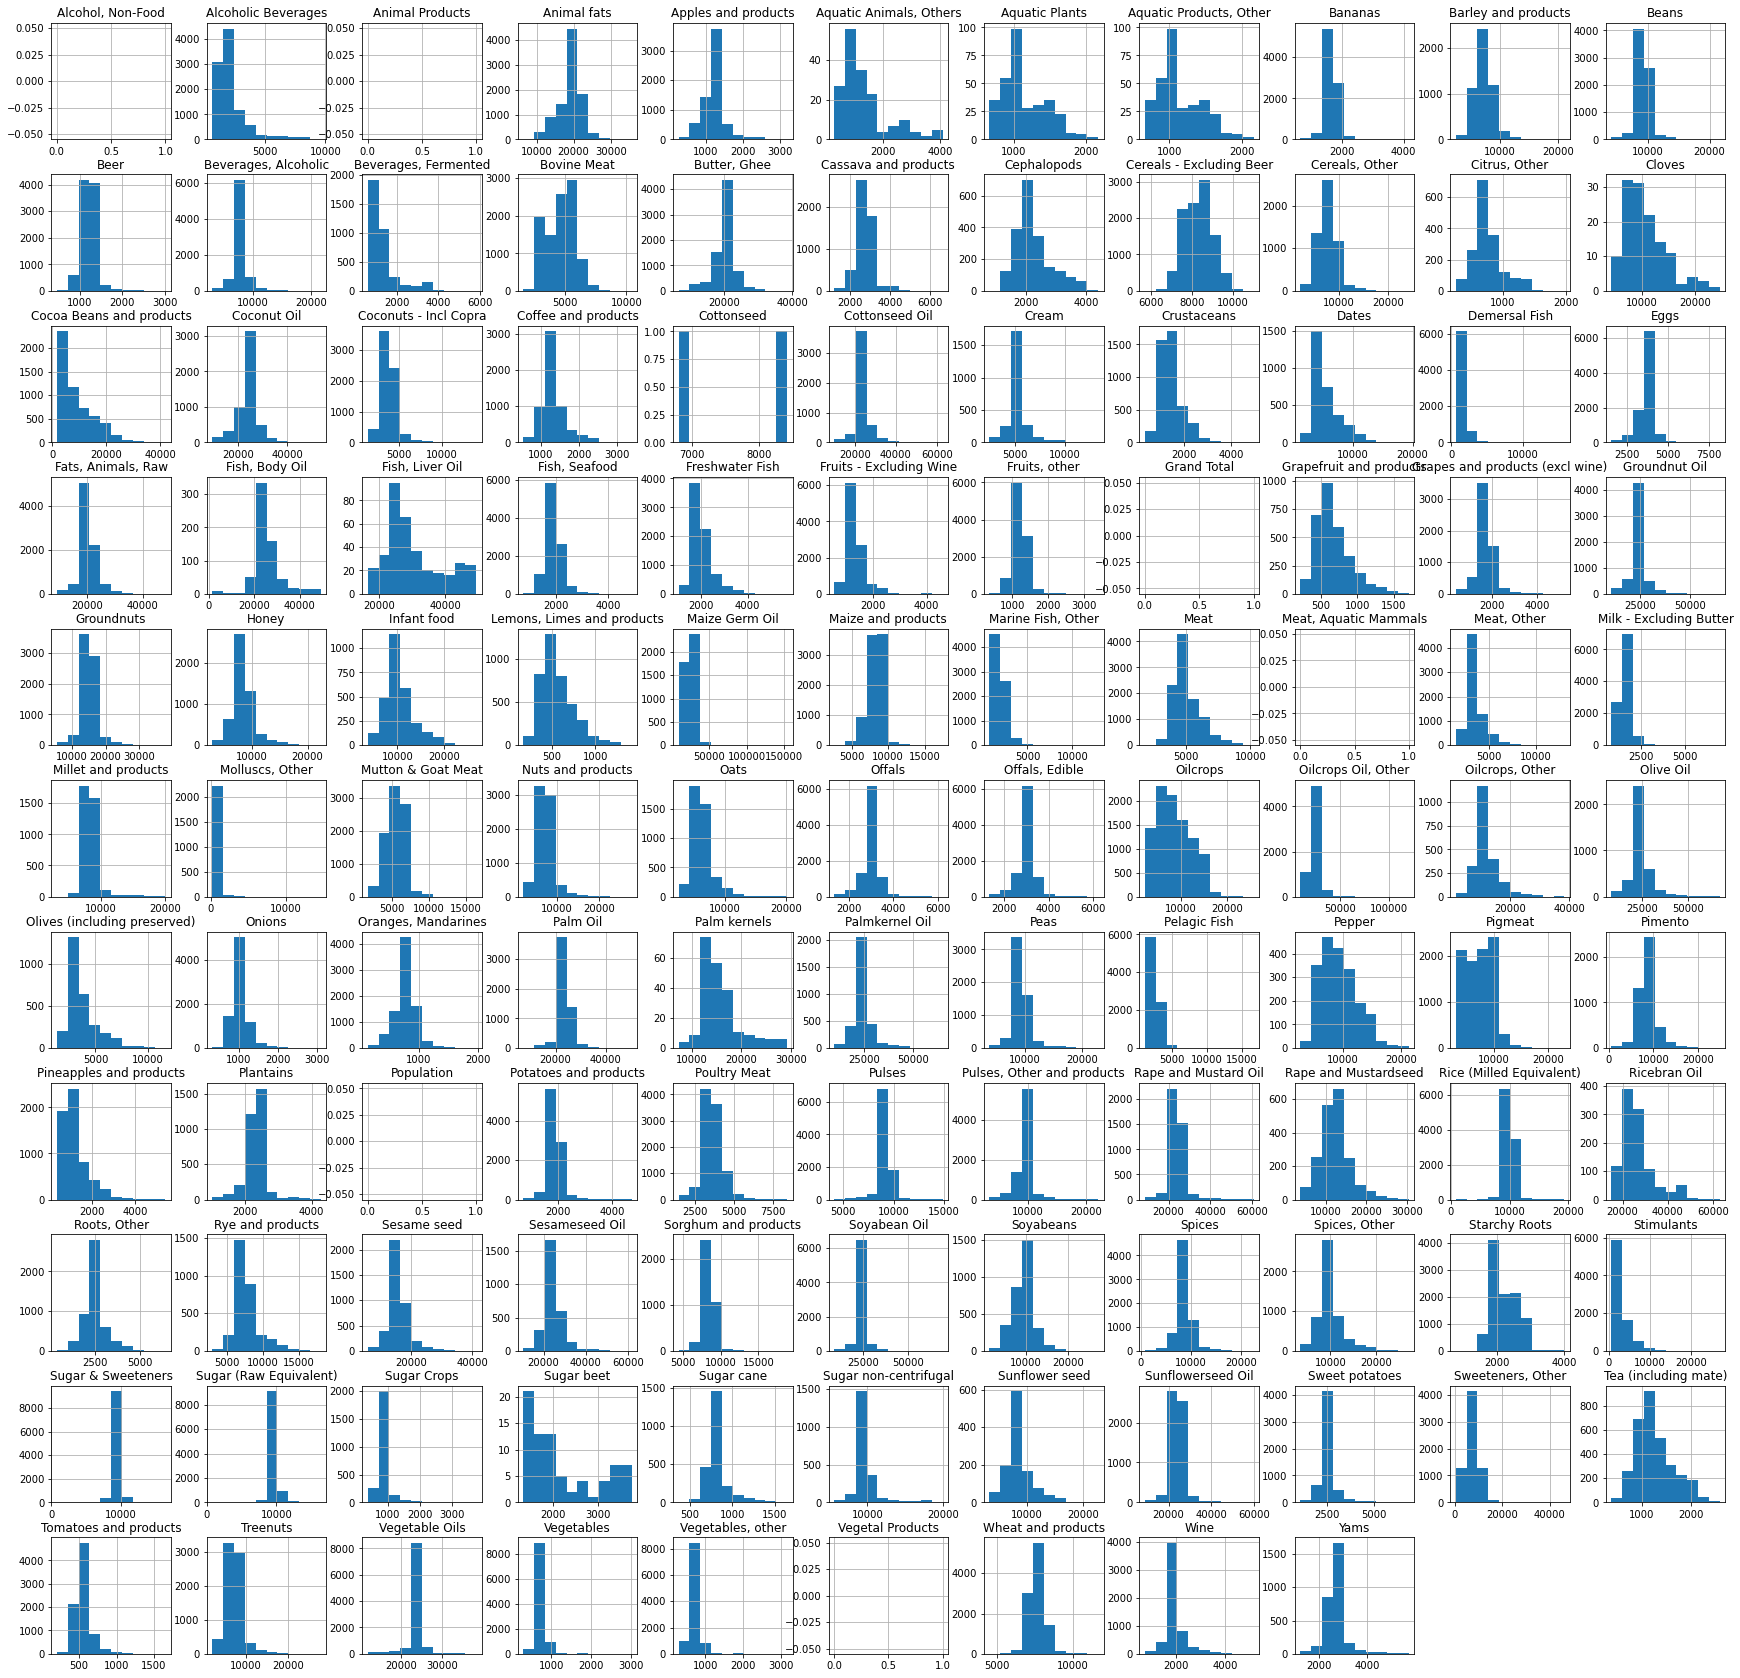

In [31]:
hists = plt.figure(figsize = (30,30))  # Size of the figure
ax = hists.gca()                                
caltonratcalc_df.hist(ax = ax)         # draw a histogram based on the dataset
plt.show()

# Use the factors to calculate the desired variables

In [32]:
# Need to adapt as there are many NaNs that make the below line of code useless (integer - NaN = NaN)
# I'll write a function to work around this. When there is no Feed and Seed data, I will set them to 0,
# as they are generally close to 0, and discounting many countries because they do not have feed and 
# seed data would bias the analysis.  I am sacrificing some accuracy in the data for more and less bias data.
#fbs_pivot_cal_to_tonne["net_production"] = fbs_pivot_cal_to_tonne.apply(lambda row: row.Production - row.Feed - row.Seed, axis=1)

In [33]:
def net_prod_calc(df):
    prod = df["Production"].tolist()
    feed = df["Feed"].tolist()
    seed = df["Seed"].tolist()
    caltonrattotal = df["caltonrattotal"].tolist()
    caltonratpercap = df["caltonratpercap"].tolist()
    # replace NaN with 0 for feed and seed
    feed = [0 if pd.isna(n) else n for n in feed]
    seed = [0 if pd.isna(n) else n for n in seed]
    net_prod1000tonnelist = []
    net_prodtotallist = []
    net_prodpercaplist = []
    for i in range(0,len(prod)):
        net_prod1000tonne = prod[i] - feed[i] - seed[i]
        net_prodtotal = net_prod1000tonne * caltonrattotal[i]
        net_prodpercap = net_prod1000tonne * caltonratpercap[i]
        net_prod1000tonnelist.append(net_prod1000tonne)
        net_prodtotallist.append(net_prodtotal)
        net_prodpercaplist.append(net_prodpercap)
    return net_prod1000tonnelist, net_prodtotallist, net_prodpercaplist

In [34]:
net_prod1000tonne, net_prodtotal, net_prodpercap = net_prod_calc(fbs_pivot_cal_to_tonne)
fbs_pivot_cal_to_tonne["net_prod1000tonne"] = net_prod1000tonne
fbs_pivot_cal_to_tonne["net_prodtotal"] = net_prodtotal
fbs_pivot_cal_to_tonne["net_prodpercap"] = net_prodpercap

In [35]:
fbs_pivot_cal_to_tonne.head()

Element,Area,Year_Code,Item,Domestic_supply_quantity,Export_Quantity,Fat_supply_quantity_(g/capita/day),Feed,Food,Food_supply_(kcal/capita/day),Food_supply_quantity_(kg/capita/yr),...,Protein_supply_quantity_(g/capita/day),Seed,Stock_Variation,Total_Population_-_Both_sexes,pop,caltonrattotal,caltonratpercap,net_prod1000tonne,net_prodtotal,net_prodpercap
0,Afghanistan,1961,Alcoholic Beverages,0.0,NaN,NaN,NaN,0.0,0.0,0.00,...,0.00,NaN,NaN,NaN,8954.0,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1961,Animal Products,NaN,NaN,18.44,NaN,NaN,247.0,NaN,...,13.53,NaN,NaN,NaN,8954.0,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1961,Animal fats,20.0,NaN,5.29,NaN,20.0,47.0,2.18,...,0.04,NaN,NaN,NaN,8954.0,21041.900000,2.350000,20.0,420838.000000,47.000000
3,Afghanistan,1961,Apples and products,15.0,0.0,0.01,NaN,14.0,2.0,1.60,...,0.01,NaN,NaN,NaN,8954.0,1279.142857,0.142857,15.0,19187.142857,2.142857
4,Afghanistan,1961,Bananas,0.0,NaN,0.00,NaN,0.0,0.0,0.00,...,0.00,NaN,NaN,NaN,8954.0,NaN,NaN,NaN,NaN,NaN


# Calculating averages of multiple years

In [36]:
# years = [2015,2016,2017,2018,2019]

In [37]:
# def checkiflast(i,a,b,c):
#     if i == (len(a) - 1):
#         result = True
#     elif a[i] == a[i+1] and b[i] == b[i+1] and c[i] == c[i+1]:
#         result = False
#     else:
#         result = True
#     return result

In [38]:
# def timemean(df, years):
#     summed = 0
#     divisor = 0
#     to_del = []
#     result = []
#     Year_Code = df["Year_Code"].tolist()
#     Value = df["Value"].tolist()
#     Area_Code = df["Area_Code"].tolist()
#     Item_Code = df["Item_Code"].tolist()
#     Element_Code = df["Element_Code"].tolist()
#     for i in range(0,len(Year_Code)):
#         yr = Year_Code[i]
#         if (yr in years) == False:
#             to_del.append(i)
#         elif (yr in years) and (checkiflast(i,Area_Code,Item_Code,Element_Code) == False):   #check it is not the last year
#             to_del.append(i)
#             divisor = divisor + 1
#             summed = summed + Value[i]
#         else:# if it is the last year
#             divisor = divisor + 1
#             summed = summed + Value[i]
#             res = summed / divisor
#             result.append(res)
#             summed = 0
#             divisor = 0
#     return to_del, result

In [39]:
#to_del, result = timemean(fbs_df_order, years)

In [40]:
#fbs_df_small = fbs_df_order.drop(fbs_df_order.index[to_del])

In [41]:
#fbs_df_small["Value"] = result

In [42]:
#fbs_df_small.head()

In [43]:
#print(fbs_df_small.info())
#print(fbs_df_small.describe())

In [44]:
#fbs_df_small = fbs_df_small.reset_index(drop=True)

# Calculating the EATLI

In [45]:
fbs_df_kcal = fbs_df_order.loc[fbs_df_order["Element"] == 'Food supply (kcal/capita/day)']

In [46]:
eatlitems = ["Grand Total", "Cereals - Excluding Beer", "Starchy Roots", "Vegetables", "Fruits - Excluding Wine", 
             "Milk - Excluding Butter", "Bovine Meat", "Pigmeat", "Poultry Meat", "Eggs", "Fish, Seafood", 
             "Pulses", "Soyabeans", "Groundnuts", "Treenuts", "Palm Oil", "Vegetable Oils", "Fats, Animals, Raw", 
             "Sugar Crops", "Butter, Ghee", "Cream", "Mutton & Goat Meat", "Sunflower seed", "Rape and Mustardseed",
             "Sesame seed", "Palmkernel Oil", "Palm Oil", "Coconut Oil", "Fish, Body Oil", "Fish, Liver Oil",
             "Sugar & Sweeteners"]

In [47]:
fbs_df_kcal_eatl = fbs_df_kcal[fbs_df_kcal.Item.isin(eatlitems)]

In [48]:
fbs_df_kcal_eatl = fbs_df_kcal_eatl[["Area","Item","Year_Code","Value"]]

In [49]:
fbs_df_kcal_eatl.head(5)

,Area,Item,Year_Code,Value
3520,Armenia,Soyabeans,1992,0.0
3521,Armenia,Soyabeans,1993,0.0
3522,Armenia,Soyabeans,1994,0.0
3523,Armenia,Soyabeans,1995,0.0
3524,Armenia,Soyabeans,1996,0.0


In [50]:
fbs_df_kcal_eatl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285553 entries, 3520 to 11116594
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Area       285553 non-null  object 
 1   Item       285553 non-null  object 
 2   Year_Code  285553 non-null  int64  
 3   Value      285553 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 10.9+ MB


In [51]:
fbs_df_kcal_eatl_pvt = pd.pivot(fbs_df_kcal_eatl, index=["Area","Year_Code"], columns="Item", values="Value")
fbs_df_kcal_eatl_pvt = fbs_df_kcal_eatl_pvt.reset_index()
fbs_df_kcal_eatl_pvt.columns=fbs_df_kcal_eatl_pvt.columns.str.replace(' ','_')
fbs_df_kcal_eatl_pvt.columns=fbs_df_kcal_eatl_pvt.columns.str.replace('-','')
fbs_df_kcal_eatl_pvt.columns=fbs_df_kcal_eatl_pvt.columns.str.replace('&','')
fbs_df_kcal_eatl_pvt.columns=fbs_df_kcal_eatl_pvt.columns.str.replace(',','')

In [54]:
def eatlicalc(df):
    eatlist = []
    for i in range(0,len(df)):
        calratio = (df.at[i,"Grand_Total"]) / 2500
        eatli = 0
        values = []
        values.append((df.at[i,"Starchy_Roots"]) / (78 * calratio))
        values.append((df.at[i,"Milk__Excluding_Butter"] + df.at[i,"Butter_Ghee"] + df.at[i,"Cream"]) / (306 * calratio))
        values.append((df.at[i,"Bovine_Meat"] + df.at[i,"Mutton__Goat_Meat"]) / (30 * calratio))
        values.append((df.at[i,"Pigmeat"]) / (30 * calratio))
        values.append((df.at[i,"Poultry_Meat"]) / (124 * calratio))
        values.append((df.at[i,"Eggs"]) / (37 * calratio))
        values.append((df.at[i,"Fish_Seafood"]) / (143 * calratio))
        values.append((df.at[i,"Pulses"]) / (344 * calratio))
        values.append((df.at[i,"Soyabeans"]) / (224 * calratio))
        values.append((df.at[i,"Groundnuts"]) / (426 * calratio))
        values.append((df.at[i,"Treenuts"] + df.at[i,"Sunflower_seed"] + df.at[i,"Sesame_seed"]
                       + df.at[i,"Rape_and_Mustardseed"]) / (149 * calratio))
        values.append((df.at[i,"Palm_Oil"]) / (60 * calratio))
        values.append((df.at[i,"Fats_Animals_Raw"]) / (36 * calratio))
        values.append((df.at[i,"Sugar__Sweeteners"] + df.at[i,"Sugar_Crops"]) / (120 * calratio))
        for j in range(0,len(values)):
            if values[j] >= 1:
                eatli = eatli + values[j]
                
        unsaturated_oils = (df.at[i,"Vegetable_Oils"] - df.at[i,"Coconut_Oil"]- df.at[i,"Palm_Oil"] 
                           - df.at[i,"Palmkernel_Oil"] + df.at[i,"Fish_Body_Oil"] + df.at[i,"Fish_Liver_Oil"])
        vegetables = df.at[i,"Vegetables"]
        fruit = df.at[i,"Fruits__Excluding_Wine"]
        if unsaturated_oils >= (708 * calratio):
            eatli = eatli + (unsaturated_oils / (708 * calratio))
        if unsaturated_oils <= (177 * calratio):
            eatli = eatli + 2 - ((unsaturated_oils) / (177 * calratio))
            
        if vegetables >= (156 * calratio):
            eatli = eatli + (vegetables / (156 * calratio))
        if vegetables <= (177 * calratio):
            eatli = eatli + 2 - ((vegetables) / (177 * calratio))
            
        if fruit >= (189 * calratio):
            eatli = eatli + (fruit / (189 * calratio))
        if fruit <= (63 * calratio):
            eatli = eatli + 2 - ((fruit) / (63 * calratio))
            
        if df.at[i,"Cereals__Excluding_Beer"] > (df.at[i,"Grand_Total"] * 0.6):
            eatli = eatli + (df.at[i,"Cereals__Excluding_Beer"] / (df.at[i,"Grand_Total"] * 0.6))
        
        eatlist.append(eatli)
    return eatlist

In [55]:
eatlilist = eatlicalc(fbs_df_kcal_eatl_pvt)

In [56]:
fbs_df_kcal_eatl_pvt["eatli"] = eatlilist

<AxesSubplot:>

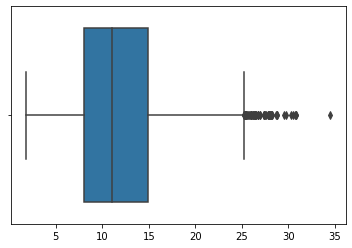

In [57]:
sns.boxplot(x=eatlilist)

array([[<AxesSubplot:title={'center':'eatli'}>]], dtype=object)

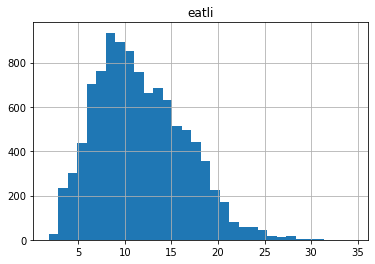

In [58]:
fbs_df_kcal_eatl_pvt.hist(column='eatli', bins=32)

# EATLI for production

In [59]:
catstotot = ["Cereals__Excluding_Beer","Eggs","Fish_Seafood","Fruits__Excluding_Wine","Meat",
             "Milk__Excluding_Butter","Offals","Oilcrops","Pulses","Spices","Starchy_Roots",
             "Stimulants","Sugar__Sweeteners","Sugar_Crops","Treenuts","Vegetable_Oils","Vegetables",
             "Alcoholic_Beverages","Animal_fats","Aquatic_Products_Other"]

In [60]:
# def eatlicalcprod(df):
#     eatlist = []
#     for i in range(0,len(df)):
#         calratio = 1
#         eatli = 0
#         values = []
#         values.append((df.at[i,"Starchy Roots"]) / (78 * calratio))
#         values.append((df.at[i,"Milk - Excluding Butter"] + df.at[i,"Butter, Ghee"] + df.at[i,"Cream"]) / (306 * calratio))
#         values.append((df.at[i,"Bovine Meat"] + df.at[i,"Mutton & Goat Meat"]) / (30 * calratio))
#         values.append((df.at[i,"Pigmeat"]) / (30 * calratio))
#         values.append((df.at[i,"Poultry Meat"]) / (124 * calratio))
#         values.append((df.at[i,"Eggs"]) / (37 * calratio))
#         values.append((df.at[i,"Fish, Seafood"]) / (143 * calratio))
#         values.append((df.at[i,"Pulses"]) / (344 * calratio))
#         values.append((df.at[i,"Soyabeans"]) / (224 * calratio))
#         values.append((df.at[i,"Groundnuts"]) / (426 * calratio))
#         values.append((df.at[i,"Treenuts"] + df.at[i,"Sunflower seed"] + df.at[i,"Sesame seed"]
#                        + df.at[i,"Rape and Mustardseed"]) / (149 * calratio))
#         values.append((df.at[i,"Palm Oil"]) / (60 * calratio))
#         values.append((df.at[i,"Fats, Animals, Raw"]) / (36 * calratio))
#         values.append((df.at[i,"Sugar & Sweeteners"] + df.at[i,"Sugar Crops"]) / (120 * calratio))
#         for j in range(0,len(values)):
#             if values[j] >= 1:
#                 eatli = eatli + values[j]
                
#         unsaturated_oils = (df.at[i,"Vegetable Oils"] - df.at[i,"Coconut Oil"]- df.at[i,"Palm Oil"] 
#                            - df.at[i,"Palmkernel Oil"] + df.at[i,"Fish, Body Oil"] + df.at[i,"Fish, Liver Oil"])
#         vegetables = df.at[i,"Vegetables"]
#         fruit = df.at[i,"Fruits - Excluding Wine"]
#         if unsaturated_oils >= (708 * calratio):
#             eatli = eatli + (unsaturated_oils / (708 * calratio))
#         if unsaturated_oils <= (177 * calratio):
#             eatli = eatli + 2 - ((unsaturated_oils) / (177 * calratio))
            
#         if vegetables >= (156 * calratio):
#             eatli = eatli + (vegetables / (156 * calratio))
#         if vegetables <= (177 * calratio):
#             eatli = eatli + 2 - ((vegetables) / (177 * calratio))
            
#         if fruit >= (189 * calratio):
#             eatli = eatli + (fruit / (189 * calratio))
#         if fruit <= (63 * calratio):
#             eatli = eatli + 2 - ((fruit) / (63 * calratio))
            
#         if df.at[i,"Cereals - Excluding Beer"] > 0:
#             eatli = eatli + (df.at[i,"Cereals - Excluding Beer"] / (df.at[i,"Grand Total"] * 0.6))
        
#         eatlist.append(eatli)
#     return eatlist

In [61]:
# def eatlicalcprod(df):
#     eatlist = []
#     for i in range(0,len(df)):
#         calratio = 1
#         eatli = 0
#         values = []
#         values.append((df.at[i,"Starchy Roots"]) / (78 * calratio))
#         values.append((df.at[i,"Milk - Excluding Butter"] + df.at[i,"Butter, Ghee"] + df.at[i,"Cream"]) / (306 * calratio))
#         values.append((df.at[i,"Bovine Meat"] + df.at[i,"Mutton & Goat Meat"]) / (30 * calratio))
#         values.append((df.at[i,"Pigmeat"]) / (30 * calratio))
#         values.append((df.at[i,"Poultry Meat"]) / (124 * calratio))
#         values.append((df.at[i,"Eggs"]) / (37 * calratio))
#         values.append((df.at[i,"Fish, Seafood"]) / (143 * calratio))
#         values.append((df.at[i,"Pulses"]) / (344 * calratio))
#         values.append((df.at[i,"Soyabeans"]) / (224 * calratio))
#         values.append((df.at[i,"Groundnuts"]) / (426 * calratio))
#         values.append((df.at[i,"Treenuts"] + df.at[i,"Sunflower seed"] + df.at[i,"Sesame seed"]
#                        + df.at[i,"Rape and Mustardseed"]) / (149 * calratio))
#         values.append((df.at[i,"Palm Oil"]) / (60 * calratio))
#         values.append((df.at[i,"Fats, Animals, Raw"]) / (36 * calratio))
#         values.append((df.at[i,"Sugar & Sweeteners"] + df.at[i,"Sugar Crops"]) / (120 * calratio))
#         for j in range(0,len(values)):
#             if values[j] > 0:
#                 eatli = eatli + values[j]
                
#         unsaturated_oils = (df.at[i,"Vegetable Oils"] - df.at[i,"Coconut Oil"]- df.at[i,"Palm Oil"] 
#                            - df.at[i,"Palmkernel Oil"] + df.at[i,"Fish, Body Oil"] + df.at[i,"Fish, Liver Oil"])
#         vegetables = df.at[i,"Vegetables"]
#         fruit = df.at[i,"Fruits - Excluding Wine"]
#         if unsaturated_oils >= (708 * calratio):
#             eatli = eatli + (unsaturated_oils / (708 * calratio))
#         if unsaturated_oils <= (177 * calratio):
#             eatli = eatli + 2 - ((unsaturated_oils) / (177 * calratio))
            
#         if vegetables >= (156 * calratio):
#             eatli = eatli + (vegetables / (156 * calratio))
#         if vegetables <= (177 * calratio):
#             eatli = eatli + 2 - ((vegetables) / (177 * calratio))
            
#         if fruit >= (189 * calratio):
#             eatli = eatli + (fruit / (189 * calratio))
#         if fruit <= (63 * calratio):
#             eatli = eatli + 2 - ((fruit) / (63 * calratio))
            
#         if df.at[i,"Cereals - Excluding Beer"] > 0:
#             eatli = eatli + (df.at[i,"Cereals - Excluding Beer"] / (df.at[i,"Grand Total"] * 0.6))
        
#         eatlist.append(eatli)
#     return eatlist

In [62]:
# def eatlicalcprod(df):
#     eatlist = []
#     for i in range(0,len(df)):
#         total = 0
#         for k in catstotot:
#             total = total + df.at[i,k]
#         calratio = total / 2500
#         eatli = 0
#         values = []
#         values.append((df.at[i,"Starchy_Roots"]) / (78 * calratio))
#         values.append((df.at[i,"Milk__Excluding_Butter"] + df.at[i,"Butter_Ghee"] + df.at[i,"Cream"]) / (306 * calratio))
#         values.append((df.at[i,"Bovine_Meat"] + df.at[i,"Mutton__Goat_Meat"]) / (30 * calratio))
#         values.append((df.at[i,"Pigmeat"]) / (30 * calratio))
#         values.append((df.at[i,"Poultry_Meat"]) / (124 * calratio))
#         values.append((df.at[i,"Eggs"]) / (37 * calratio))
#         values.append((df.at[i,"Fish_Seafood"]) / (143 * calratio))
#         values.append((df.at[i,"Pulses"]) / (344 * calratio))
#         values.append((df.at[i,"Soyabeans"]) / (224 * calratio))
#         values.append((df.at[i,"Groundnuts"]) / (426 * calratio))
#         values.append((df.at[i,"Treenuts"] + df.at[i,"Sunflower_seed"] + df.at[i,"Sesame_seed"]
#                        + df.at[i,"Rape_and_Mustardseed"]) / (149 * calratio))
#         values.append((df.at[i,"Palm_Oil"]) / (60 * calratio))
#         values.append((df.at[i,"Fats_Animals_Raw"]) / (36 * calratio))
#         values.append((df.at[i,"Sugar__Sweeteners"] + df.at[i,"Sugar_Crops"]) / (120 * calratio))
#         for j in range(0,len(values)):
#             if values[j] >= 1:
#                 eatli = eatli + values[j]
                
#         unsaturated_oils = (df.at[i,"Vegetable_Oils"] - df.at[i,"Coconut_Oil"]- df.at[i,"Palm_Oil"] 
#                            - df.at[i,"Palmkernel_Oil"] + df.at[i,"Fish_Body_Oil"] + df.at[i,"Fish_Liver_Oil"])
#         vegetables = df.at[i,"Vegetables"]
#         fruit = df.at[i,"Fruits__Excluding_Wine"]
#         if unsaturated_oils >= (708 * calratio):
#             eatli = eatli + (unsaturated_oils / (708 * calratio))
#         if unsaturated_oils <= (177 * calratio):
#             eatli = eatli + 2 - ((unsaturated_oils) / (177 * calratio))
            
#         if vegetables >= (156 * calratio):
#             eatli = eatli + (vegetables / (156 * calratio))
#         if vegetables <= (177 * calratio):
#             eatli = eatli + 2 - ((vegetables) / (177 * calratio))
            
#         if fruit >= (189 * calratio):
#             eatli = eatli + (fruit / (189 * calratio))
#         if fruit <= (63 * calratio):
#             eatli = eatli + 2 - ((fruit) / (63 * calratio))
            
#         if df.at[i,"Cereals__Excluding_Beer"] > (total * 0.6):
#             eatli = eatli + (df.at[i,"Cereals__Excluding_Beer"] / (total * 0.6))
        
#         eatlist.append(eatli)
#     return eatlist

In [89]:
def eatlicalcprod(df):
    eatlist = []
    for i in range(0,len(df)):
        calratio = (df.at[i,"Grand_Total"]) / 2500
        eatli = 0
        values = []
        values.append((df.at[i,"Starchy_Roots"]) / (78 * calratio))
        values.append((df.at[i,"Milk__Excluding_Butter"] + df.at[i,"Butter_Ghee"] + df.at[i,"Cream"]) / (306 * calratio))
        values.append((df.at[i,"Bovine_Meat"] + df.at[i,"Mutton__Goat_Meat"]) / (30 * calratio))
        values.append((df.at[i,"Pigmeat"]) / (30 * calratio))
        values.append((df.at[i,"Poultry_Meat"]) / (124 * calratio))
        values.append((df.at[i,"Eggs"]) / (37 * calratio))
        values.append((df.at[i,"Fish_Seafood"]) / (143 * calratio))
        values.append((df.at[i,"Pulses"]) / (344 * calratio))
        values.append((df.at[i,"Soyabeans"]) / (224 * calratio))
        values.append((df.at[i,"Groundnuts"]) / (426 * calratio))
        values.append((df.at[i,"Treenuts"] + df.at[i,"Sunflower_seed"] + df.at[i,"Sesame_seed"]
                       + df.at[i,"Rape_and_Mustardseed"]) / (149 * calratio))
        values.append((df.at[i,"Palm_Oil"]) / (60 * calratio))
        values.append((df.at[i,"Fats_Animals_Raw"]) / (36 * calratio))
        values.append((df.at[i,"Sugar__Sweeteners"] + df.at[i,"Sugar_Crops"]) / (120 * calratio))
        for j in range(0,len(values)):
            if values[j] >= 0:
                eatli = eatli + values[j]
                
        unsaturated_oils = (df.at[i,"Vegetable_Oils"] - df.at[i,"Coconut_Oil"]- df.at[i,"Palm_Oil"] 
                           - df.at[i,"Palmkernel_Oil"] + df.at[i,"Fish_Body_Oil"] + df.at[i,"Fish_Liver_Oil"])
        vegetables = df.at[i,"Vegetables"]
        fruit = df.at[i,"Fruits__Excluding_Wine"]
        if unsaturated_oils >= (708 * calratio):
            eatli = eatli + (unsaturated_oils / (708 * calratio))
        if unsaturated_oils <= (177 * calratio):
            eatli = eatli + 2 - ((unsaturated_oils) / (177 * calratio))
            
        if vegetables >= (156 * calratio):
            eatli = eatli + (vegetables / (156 * calratio))
        if vegetables <= (177 * calratio):
            eatli = eatli + 2 - ((vegetables) / (177 * calratio))
            
        if fruit >= (189 * calratio):
            eatli = eatli + (fruit / (189 * calratio))
        if fruit <= (63 * calratio):
            eatli = eatli + 2 - ((fruit) / (63 * calratio))
            
        if df.at[i,"Cereals__Excluding_Beer"] > (df.at[i,"Grand_Total"] * 0.6):
            eatli = eatli + (df.at[i,"Cereals__Excluding_Beer"] / (df.at[i,"Grand_Total"] * 0.6))
        
        eatlist.append(eatli)
    return eatlist

In [90]:
#fbs_pivot_cal_to_tonneeatli = fbs_pivot_cal_to_tonne[fbs_pivot_cal_to_tonne.Item.isin(eatlitems)]
fbs_pivot_cal_to_tonneeatli = fbs_pivot_cal_to_tonne

In [91]:
fbs_pivot_cal_to_tonneeatli = fbs_pivot_cal_to_tonneeatli[["Area","Item","Year_Code","net_prodtotal","net_prodpercap"]]

In [123]:
# Setting up the pivot table
fbs_pivot_cal_to_tonneeatlitot = pd.pivot(fbs_pivot_cal_to_tonneeatli, index=["Area","Year_Code"], columns="Item", values="net_prodtotal")
fbs_pivot_cal_to_tonneeatlitot = fbs_pivot_cal_to_tonneeatlitot.reset_index()
fbs_pivot_cal_to_tonneeatlitot.columns=fbs_pivot_cal_to_tonneeatlitot.columns.str.replace(' ','_')
fbs_pivot_cal_to_tonneeatlitot.columns=fbs_pivot_cal_to_tonneeatlitot.columns.str.replace('-','')
fbs_pivot_cal_to_tonneeatlitot.columns=fbs_pivot_cal_to_tonneeatlitot.columns.str.replace('&','')
fbs_pivot_cal_to_tonneeatlitot.columns=fbs_pivot_cal_to_tonneeatlitot.columns.str.replace(',','')
fbs_pivot_cal_to_tonneeatli2 = pd.pivot(fbs_pivot_cal_to_tonneeatli, index=["Area","Year_Code"], columns="Item", values="net_prodpercap")
fbs_pivot_cal_to_tonneeatli2 = fbs_pivot_cal_to_tonneeatli2.reset_index()
fbs_pivot_cal_to_tonneeatli2.columns=fbs_pivot_cal_to_tonneeatli2.columns.str.replace(' ','_')
fbs_pivot_cal_to_tonneeatli2.columns=fbs_pivot_cal_to_tonneeatli2.columns.str.replace('-','')
fbs_pivot_cal_to_tonneeatli2.columns=fbs_pivot_cal_to_tonneeatli2.columns.str.replace('&','')
fbs_pivot_cal_to_tonneeatli2.columns=fbs_pivot_cal_to_tonneeatli2.columns.str.replace(',','')

In [124]:
# fbs_pivot_cal_to_tonneeatli2.loc[:,"Grand_Total"] = fbs_pivot_cal_to_tonneeatli2.loc[:,["Cereals__Excluding_Beer","Eggs",
#              "Fish_Seafood","Fruits__Excluding_Wine","Meat",
#              "Milk__Excluding_Butter","Offals","Oilcrops","Pulses","Spices","Starchy_Roots",
#              "Stimulants","Sugar__Sweeteners","Sugar_Crops","Treenuts","Vegetable_Oils","Vegetables",
#              "Alcoholic_Beverages","Animal_fats","Aquatic_Products_Other"]].sum(axis=1, min_count=1)

# fbs_pivot_cal_to_tonneeatlitot.loc[:,"Grand_Total"] = fbs_pivot_cal_to_tonneeatlitot.loc[:,["Cereals__Excluding_Beer","Eggs",
#              "Fish_Seafood","Fruits__Excluding_Wine","Meat",
#              "Milk__Excluding_Butter","Offals","Oilcrops","Pulses","Spices","Starchy_Roots",
#              "Stimulants","Sugar__Sweeteners","Sugar_Crops","Treenuts","Vegetable_Oils","Vegetables",
#              "Alcoholic_Beverages","Animal_fats","Aquatic_Products_Other"]].sum(axis=1, min_count=1)

In [125]:
def calcgrandtotal(df):
    grandtotlist = []
    for i in range(0,len(df)):
        grandtot = 0
        for j in catstotot:
            if df.at[i,j] > 0:
                grandtot = grandtot + df.at[i,j]
        grandtotlist.append(grandtot)
    return grandtotlist

In [126]:
fbs_pivot_cal_to_tonneeatli2["Grand_Total"] = calcgrandtotal(fbs_pivot_cal_to_tonneeatli2)
fbs_pivot_cal_to_tonneeatlitot["Grand_Total"] = calcgrandtotal(fbs_pivot_cal_to_tonneeatlitot)

In [127]:
eatliprodtot = eatlicalcprod(fbs_pivot_cal_to_tonneeatlitot)
eatliprodpercap = eatlicalcprod(fbs_pivot_cal_to_tonneeatli2)
#del [fbs_pivot_cal_to_tonneeatlitot]

In [129]:
fbs_pivot_cal_to_tonneeatli2 == fbs_pivot_cal_to_tonneeatlitot

Item,Area,Year_Code,Alcohol_NonFood,Alcoholic_Beverages,Animal_Products,Animal_fats,Apples_and_products,Aquatic_Animals_Others,Aquatic_Plants,Aquatic_Products_Other,...,Tea_(including_mate),Tomatoes_and_products,Treenuts,Vegetable_Oils,Vegetables,Vegetables_other,Vegetal_Products,Wheat_and_products,Wine,Yams
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10388,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10389,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10390,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10391,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [132]:
eatliprodtot  eatliprodpercap

TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [131]:
#print(fbs_pivot_cal_to_tonneeatli2["Grand_Total"].describe())
#eatliprodpercap
eatliprodtot

[7.2478268610505845,
 7.255788048844227,
 7.4376166892625415,
 6.327067223788322,
 6.377552456003189,
 6.9673223586697635,
 6.827830285393448,
 7.059733922280792,
 6.9181427067024766,
 7.216480855693662,
 7.616915465590223,
 6.598527526400727,
 6.490185858072348,
 6.463741359848156,
 6.468318747009208,
 7.027875564404248,
 7.317759790598412,
 7.280264302843147,
 7.378279827561279,
 7.688586839670787,
 7.877804154500194,
 8.154148956687195,
 8.027056214365086,
 7.938628822525753,
 7.871951322717662,
 7.85976065086639,
 7.641599540580683,
 8.214795604083701,
 8.630511280573424,
 9.15606173009519,
 8.938709472597056,
 9.123923767169671,
 8.575667063611256,
 8.548964937920253,
 8.568446069309427,
 8.855086156527184,
 8.728796152800449,
 8.785184528591444,
 9.336816740914916,
 10.091795351341961,
 10.116295065566595,
 7.67259977777605,
 8.181213766224651,
 8.24889644850592,
 8.094264986040521,
 7.085987875919058,
 7.446342472929279,
 7.942400652932147,
 7.732883554352705,
 8.056526388569518

In [99]:
fbs_pivot_cal_to_tonneeatli2["eatliprodpercap"] = eatliprodpercap
fbs_pivot_cal_to_tonneeatli2["eatliprodtot"] = eatliprodtot

In [100]:
fbs_pivot_cal_to_tonneeatli2["eatliprodpercapln"] = fbs_pivot_cal_to_tonneeatli2["eatliprodpercap"].apply(lambda x: np.log(x + 1))

<AxesSubplot:xlabel='eatliprodpercap'>

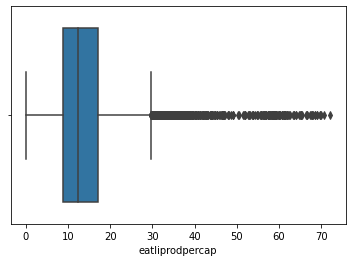

In [101]:
sns.boxplot(x=fbs_pivot_cal_to_tonneeatli2["eatliprodpercap"])

array([[<AxesSubplot:title={'center':'eatliprodpercap'}>]], dtype=object)

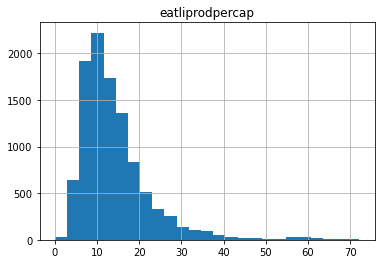

In [102]:
fbs_pivot_cal_to_tonneeatli2.hist(column='eatliprodpercap', bins=25)

<AxesSubplot:xlabel='eatliprodpercapln'>

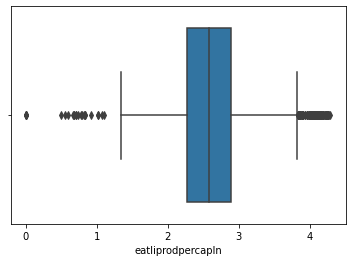

In [103]:
sns.boxplot(x=fbs_pivot_cal_to_tonneeatli2["eatliprodpercapln"])

array([[<AxesSubplot:title={'center':'eatliprodpercapln'}>]], dtype=object)

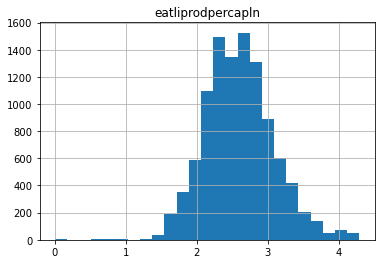

In [104]:
fbs_pivot_cal_to_tonneeatli2.hist(column='eatliprodpercapln', bins=25)

In [105]:
fbs_pivot_cal_to_tonneeatli2["eatliprodtotln"] = fbs_pivot_cal_to_tonneeatli2["eatliprodtot"].apply(lambda x: np.log(x + 1))

<AxesSubplot:xlabel='eatliprodtot'>

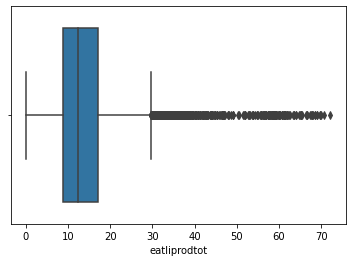

In [106]:
sns.boxplot(x=fbs_pivot_cal_to_tonneeatli2["eatliprodtot"])

array([[<AxesSubplot:title={'center':'eatliprodtot'}>]], dtype=object)

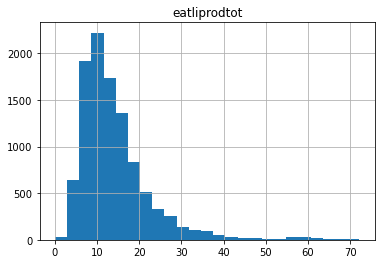

In [107]:
fbs_pivot_cal_to_tonneeatli2.hist(column='eatliprodtot', bins=25)

<AxesSubplot:xlabel='eatliprodtotln'>

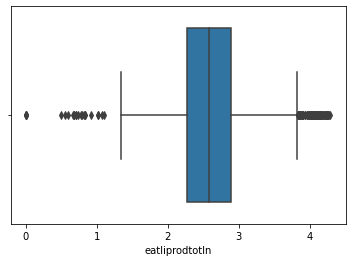

In [108]:
sns.boxplot(x=fbs_pivot_cal_to_tonneeatli2["eatliprodtotln"])

array([[<AxesSubplot:title={'center':'eatliprodtotln'}>]], dtype=object)

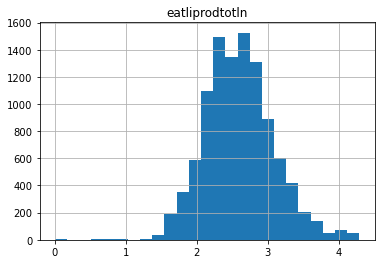

In [109]:
fbs_pivot_cal_to_tonneeatli2.hist(column='eatliprodtotln', bins=25)

In [110]:
print(fbs_pivot_cal_to_tonneeatli2.info())
print(fbs_pivot_cal_to_tonneeatli2.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10393 entries, 0 to 10392
Columns: 125 entries, Area to eatliprodtotln
dtypes: float64(123), int64(1), object(1)
memory usage: 9.9+ MB
None
Item      Year_Code  Alcohol_NonFood  Alcoholic_Beverages  Animal_Products  \
count  10393.000000              0.0          9537.000000              0.0   
mean    1987.725585              NaN            83.433339              NaN   
std       15.357741              NaN            81.088474              NaN   
min     1961.000000              NaN             0.000000              NaN   
25%     1974.000000              NaN            22.000000              NaN   
50%     1988.000000              NaN            55.800000              NaN   
75%     2001.000000              NaN           127.810838              NaN   
max     2013.000000              NaN           609.595062              NaN   

Item   Animal_fats  Apples_and_products  Aquatic_Animals_Others  \
count  9294.000000          5105.000000 

C:\Users\T430\AppData\Local\Temp/ipykernel_19428/3412389168.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  fbs_pivot_cal_to_tonneeatli2.hist(ax = ax)         # draw a histogram based on the dataset


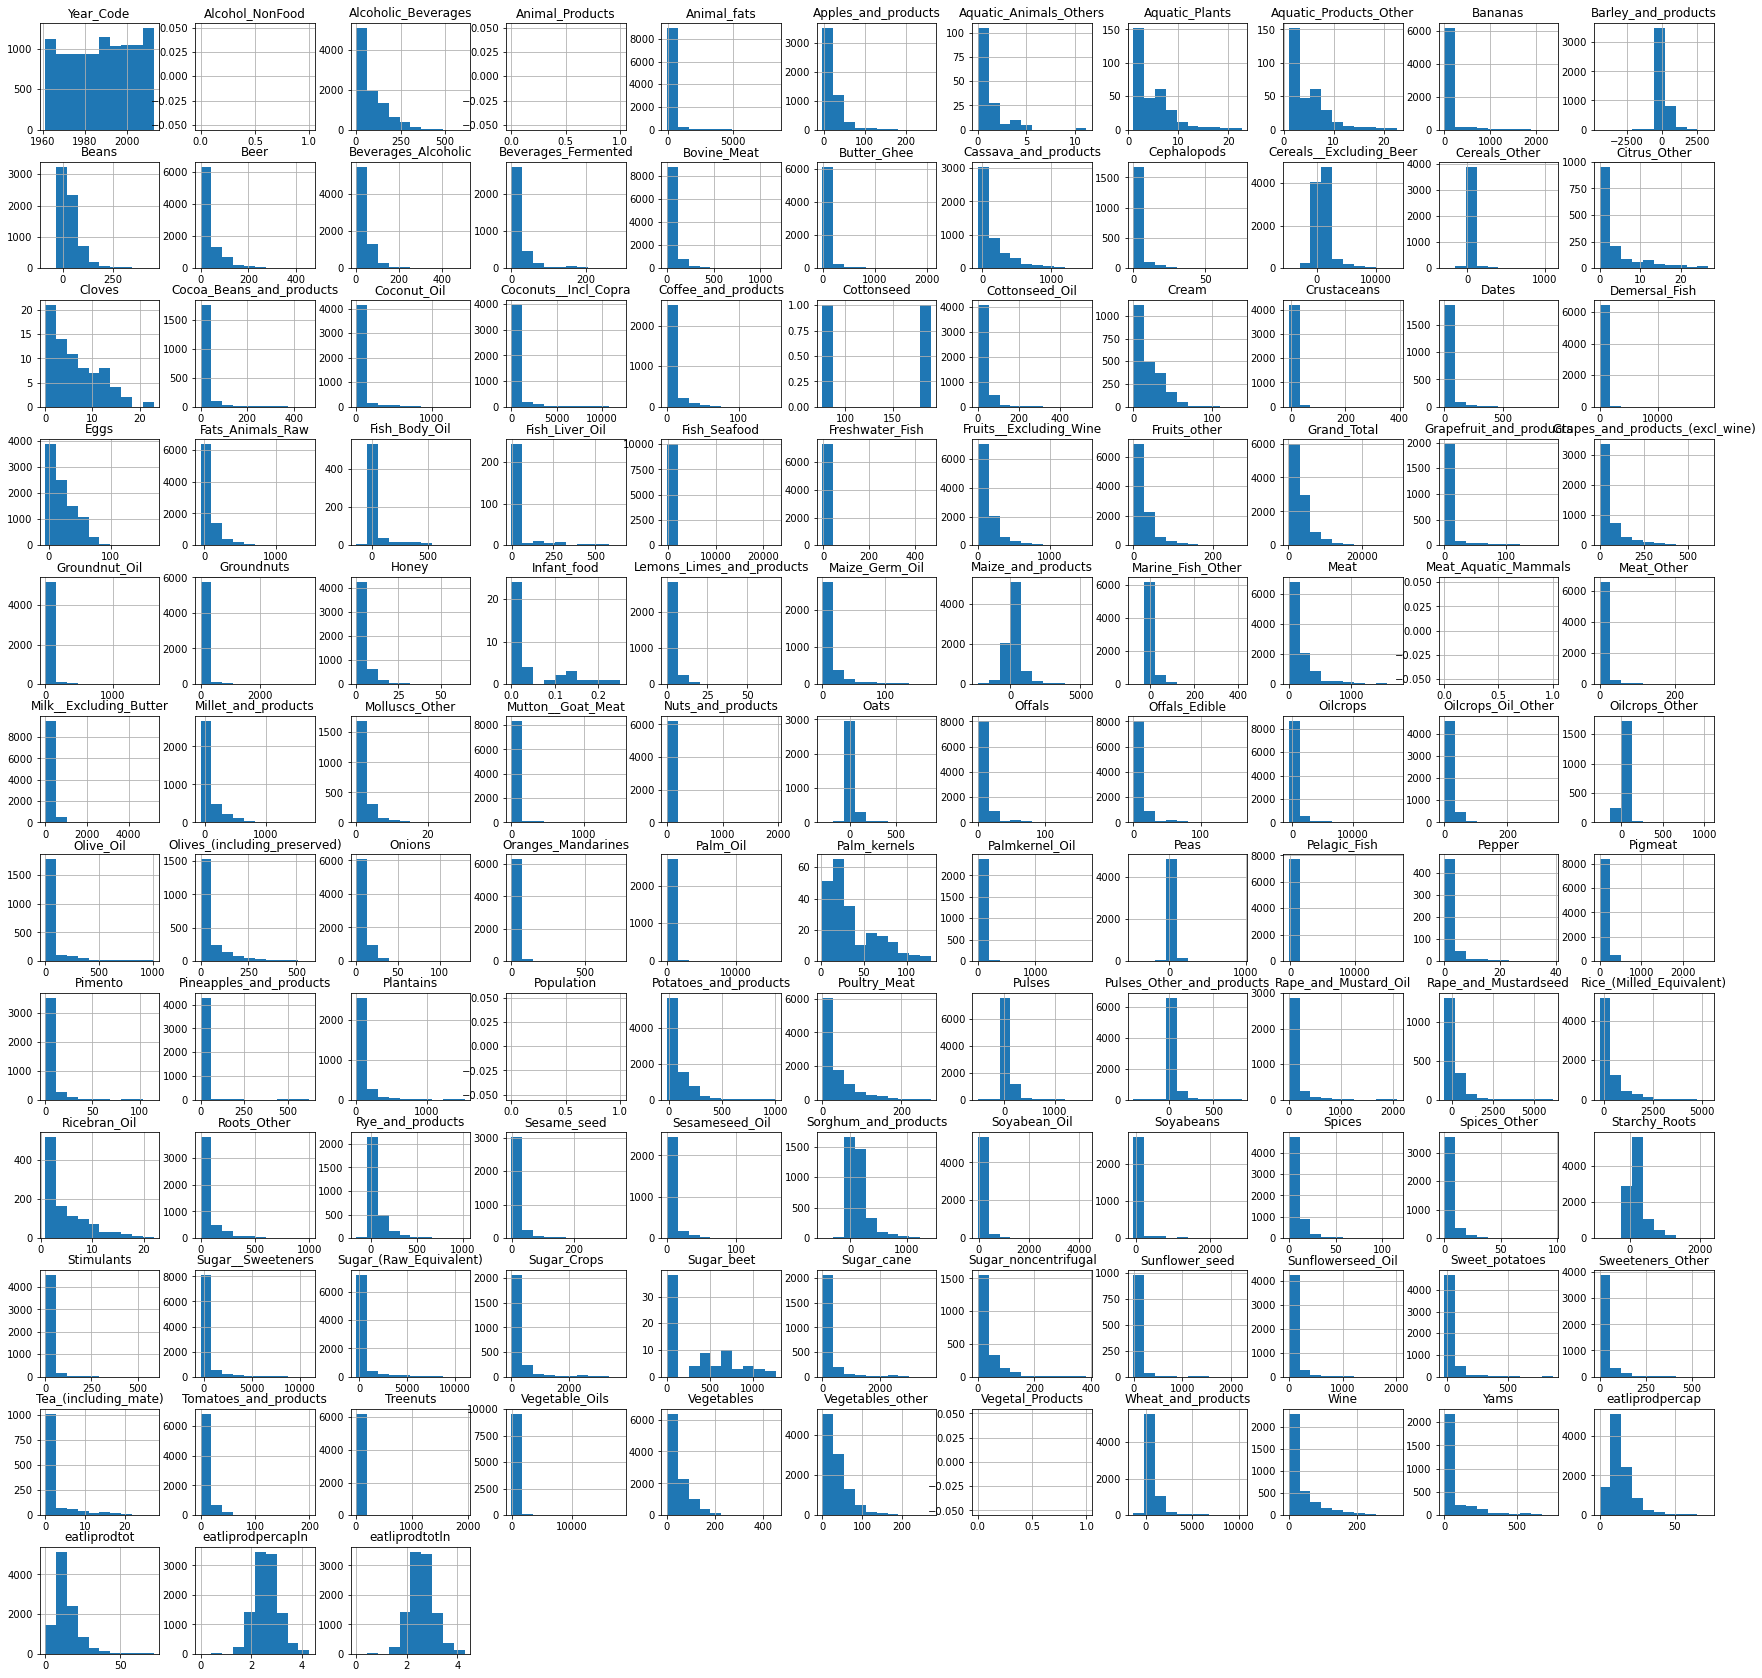

In [111]:
hists = plt.figure(figsize = (30,30))  # Size of the figure
ax = hists.gca()                                
fbs_pivot_cal_to_tonneeatli2.hist(ax = ax)         # draw a histogram based on the dataset
plt.show()

In [112]:
#print(fbs_pivot_cal_to_tonneeatli2["Grand_Total"].info())
print(fbs_pivot_cal_to_tonneeatli2["Grand_Total"].describe())

count    10393.000000
mean      3593.380430
std       2989.349111
min         56.332716
25%       1973.391870
50%       2733.713559
75%       4221.450221
max      29566.116334
Name: Grand_Total, dtype: float64
